<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Time_Series/Suavizaci%C3%B3n_Exponencial_Doble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [ ]:
warnings.filterwarnings['ignore']
warnings.simplefilter['ignore', ConvergenceWarning]

TypeError: ignored

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col=['date'])

In [ ]:
data = df['value'].resample('A').sum()

data.index = pd.to_datetime(data.index, format='%Y/%m/%D')
data.index = data.index.strftime('%Y')
data = pd.DataFrame(data, columns=['value'])
data

,value
date,
1991,21.442946
1992,45.686946
1993,55.532688
1994,60.816080
1995,67.326599
1996,77.397927
1997,85.131672
1998,93.310626
1999,105.959043


No handles with labels found to put in legend.


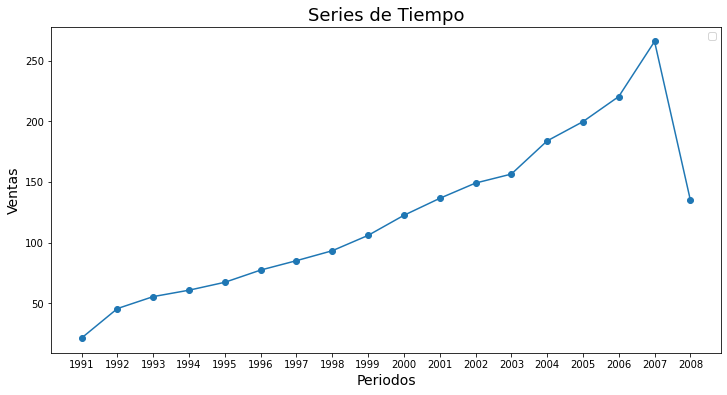

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data, '-o')

plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()

# suavizacion exponencial

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
m = SimpleExpSmoothing(data['value']).fit(smoothing_level=0.5, optimized=False)
data['ES'] = m.fittedvalues
data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


,value,ES
date,,
1991,21.442946,21.442946
1992,45.686946,21.442946
1993,55.532688,33.564946
1994,60.816080,44.548817
1995,67.326599,52.682448
1996,77.397927,60.004524
1997,85.131672,68.701225
1998,93.310626,76.916448
1999,105.959043,85.113537


In [ ]:
pred = m.forecast(3)
pred

2009-01-01    184.282778
2010-01-01    184.282778
2011-01-01    184.282778
Freq: AS-JAN, dtype: float64

In [ ]:
pred.index =  pd.to_datetime(pred.index, format='%Y/%m/%D')
pred.index = pred.index.strftime('%Y')

pred_ES = pd.concat([data['ES'], pred])
pred_ES

1991     21.442946
1992     21.442946
1993     33.564946
1994     44.548817
1995     52.682448
1996     60.004524
1997     68.701225
1998     76.916448
1999     85.113537
2000     95.536290
2001    109.016438
2002    122.741940
2003    135.904038
2004    146.184150
2005    164.991542
2006    182.323569
2007    201.339122
2008    233.529044
2009    184.282778
2010    184.282778
2011    184.282778
dtype: float64

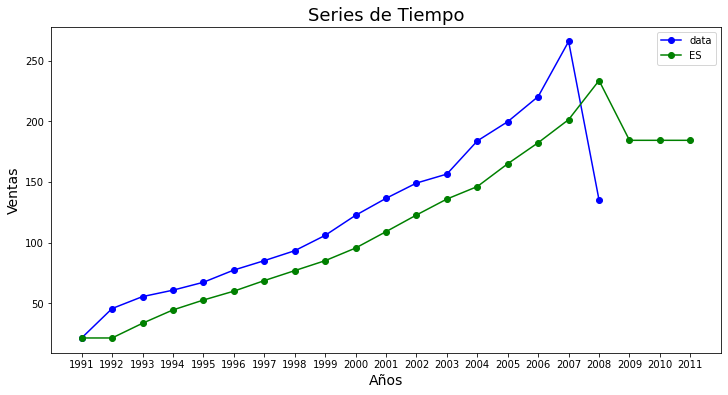

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['value'], '-o', color='blue', label='data')
plt.plot(pred_ES, '-o', color='green', label='ES')

plt.xlabel('Años', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()

# Suavizacion exponencial metodo de Holt

In [ ]:
from statsmodels.tsa.api import Holt 


In [ ]:
m = Holt(data['value']).fit(smoothing_level=0.5, smoothing_slope=0.2, optimized=False)
data['Holt'] = m.fittedvalues
data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


,value,ES,Holt
date,,,
1991,21.442946,21.442946,45.686946
1992,45.686946,21.442946,55.384546
1993,55.532688,33.564946,71.385586
1994,60.816080,44.548817,82.723687
1995,67.326599,52.682448,88.843673
1996,77.397927,60.004524,93.007218
1997,85.131672,68.701225,98.563725
1998,93.310626,76.916448,103.865646
1999,105.959043,85.113537,109.550581


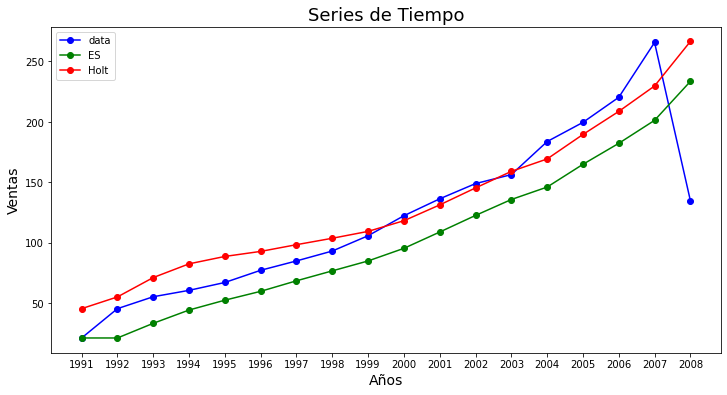

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], '-o', color='blue', label='data')
plt.plot(data.index, data['ES'], '-o', color='green', label='ES')
plt.plot(data.index, data['Holt'], '-o', color='red', label='Holt')


plt.xlabel('Años', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()

In [ ]:
pred = m.forecast(3)
pred

2009-01-01    206.449449
2010-01-01    212.109815
2011-01-01    217.770180
Freq: AS-JAN, dtype: float64

In [ ]:
pred.index = pd.to_datetime(pred.index, format='%Y/%m/%D')
pred.index = pred.index.strftime('%Y')

pred_Holt = pd.concat([data['Holt'], pred])
pred_Holt

1991     45.686946
1992     55.384546
1993     71.385586
1994     82.723687
1995     88.843673
1996     93.007218
1997     98.563725
1998    103.865646
1999    109.550581
2000    118.358104
2001    131.444484
2002    145.475399
2003    159.149276
2004    169.416777
2005    189.656080
2006    208.704013
2007    229.742586
2008    266.541655
2009    206.449449
2010    212.109815
2011    217.770180
dtype: float64

In [ ]:
m.params_formatted

,name,param,optimized
smoothing_level,alpha,0.500000,False
smoothing_slope,beta,0.200000,False
initial_level,l.0,21.442946,False
initial_slope,b.0,24.244000,False


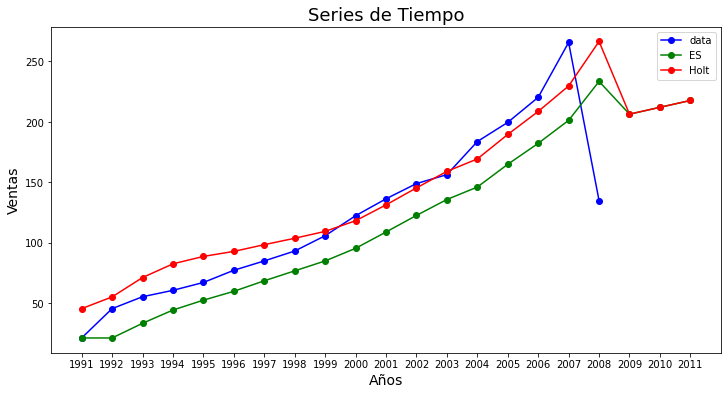

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], '-o', color='blue', label='data')
plt.plot(pred_ES, '-o', color='green', label='ES')
plt.plot(pred_Holt, '-o', color='red', label='Holt')


plt.xlabel('Años', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_precentage_error as MAPE

In [ ]:
y_true = data['value']

y_ES = data['ES']
y_holt = data['Holt']

In [ ]:
# MSE Suavizacion Exponencial
print('MSE Suavizacion Exponencial: ', MES(y_ture, y_ES))
print('MSE Suavizacion Exponencial Holt: ', MSE(y_true, y_holt))

#